In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import datetime
import matplotlib.dates as mdates


# Khám phá dữ liệu
**Đọc file dữ liệu**

In [2]:
df = pd.read_csv("household_power_consumption.txt",sep = ';')

C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


**Kiểm tra kiểu dữ liệu**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


---
# Tiền xử lí
**Chọn dữ liệu trong hai ngày 2-2-2007 và 1-2-2007**

In [5]:
df = df[(df.Date == '2/2/2007') | (df.Date == '1/2/2007')]

In [6]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
66636,1/2/2007,00:00:00,0.326,0.128,243.150,1.400,0.000,0.000,0.0
66637,1/2/2007,00:01:00,0.326,0.130,243.320,1.400,0.000,0.000,0.0
66638,1/2/2007,00:02:00,0.324,0.132,243.510,1.400,0.000,0.000,0.0
66639,1/2/2007,00:03:00,0.324,0.134,243.900,1.400,0.000,0.000,0.0
66640,1/2/2007,00:04:00,0.322,0.130,243.160,1.400,0.000,0.000,0.0
...,...,...,...,...,...,...,...,...,...
69511,2/2/2007,23:55:00,3.696,0.226,240.900,15.200,0.000,1.000,18.0
69512,2/2/2007,23:56:00,3.698,0.226,241.020,15.200,0.000,2.000,18.0
69513,2/2/2007,23:57:00,3.684,0.224,240.480,15.200,0.000,1.000,18.0
69514,2/2/2007,23:58:00,3.658,0.220,239.610,15.200,0.000,1.000,17.0


**Đưa về đúng định dạng**
- Chuyển những cột `'Global_active_power'` , `'Global_reactive_power'` , `'Voltage'` ,`'Global_intensity'` ,`'Sub_metering_1'` ,`'Sub_metering_2'` sang định dạng số

In [7]:
col_num = ['Global_active_power','Global_reactive_power', 'Voltage','Global_intensity','Sub_metering_1','Sub_metering_2']
for col in col_num:
    df[col] = pd.to_numeric(df[col], errors = 'coerce')

# Khám phá dữ liệu
**Kiểm tra kiểu dữ liệu**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2880 entries, 66636 to 69515
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   2880 non-null   object 
 1   Time                   2880 non-null   object 
 2   Global_active_power    2880 non-null   float64
 3   Global_reactive_power  2880 non-null   float64
 4   Voltage                2880 non-null   float64
 5   Global_intensity       2880 non-null   float64
 6   Sub_metering_1         2880 non-null   float64
 7   Sub_metering_2         2880 non-null   float64
 8   Sub_metering_3         2880 non-null   float64
dtypes: float64(7), object(2)
memory usage: 225.0+ KB


---
# Vẽ hình 
**Plot1**

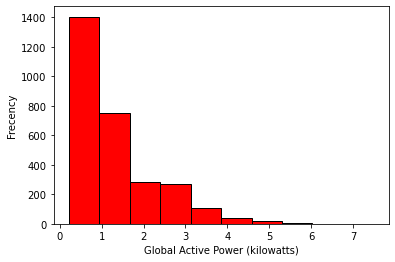

In [9]:
def plot1(ax=None):
    if ax==None:
        fig, ax = plt.subplots()
        check = False
    if ax!= None:
        check = True
    ax.hist(df['Global_active_power'],color = 'red',edgecolor='black')
    ax.set_xlabel("Global Active Power (kilowatts)")
    ax.set_ylabel("Frecency")
    plt.savefig("plot1.png")
plot1()

**Plot2, plot4, plot5**
- vì các plot đều thể mối quan hệ `'Global_active_power'` , `'Global_reactive_power'` , `'Voltage'` ,`'Global_intensity'` ,`'Sub_metering_1'` ,`'Sub_metering_2'` qua thời gian,vì vậy thực hiện các bước sau:
    - Thêm một cột `date_time` thể hiện ngày và giờ của dữ liệu
    - `date_time` thành index của dataframe

In [10]:
df1= df

In [11]:
df1['date_time'] = pd.to_datetime(df1['Date'] + df1['Time'], format = '%d/%m/%Y%H:%M:%S')

In [12]:
df1.set_index('date_time', inplace = True)

In [13]:
df1

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,,,
2007-02-01 00:00:00,1/2/2007,00:00:00,0.326,0.128,243.15,1.4,0.0,0.0,0.0
2007-02-01 00:01:00,1/2/2007,00:01:00,0.326,0.130,243.32,1.4,0.0,0.0,0.0
2007-02-01 00:02:00,1/2/2007,00:02:00,0.324,0.132,243.51,1.4,0.0,0.0,0.0
2007-02-01 00:03:00,1/2/2007,00:03:00,0.324,0.134,243.90,1.4,0.0,0.0,0.0
2007-02-01 00:04:00,1/2/2007,00:04:00,0.322,0.130,243.16,1.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2007-02-02 23:55:00,2/2/2007,23:55:00,3.696,0.226,240.90,15.2,0.0,1.0,18.0
2007-02-02 23:56:00,2/2/2007,23:56:00,3.698,0.226,241.02,15.2,0.0,2.0,18.0
2007-02-02 23:57:00,2/2/2007,23:57:00,3.684,0.224,240.48,15.2,0.0,1.0,18.0


**Plot2**

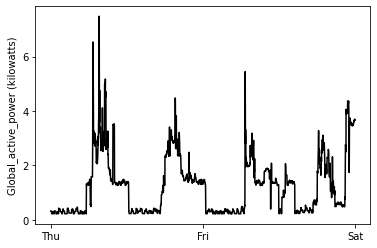

In [14]:
def plot2(ax = None):
    if ax == None:
        fig, ax = plt.subplots()
        check = False
    else: 
        check = True
    ax.plot(df1['Global_active_power'],'black')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%a'))
    for i in [1,2,3,5,6,7]:
        ax.xaxis.get_major_ticks()[i].set_visible(False)  
    for i in [2,4,6,8]: 
        ax.yaxis.get_major_ticks()[i].set_visible(False)
    ax.set_ylabel('Global_active_power (kilowatts)')
    if check == False:
        plt.savefig('plot2.png')
plot2()

**Plot3**

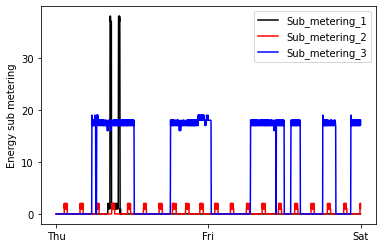

In [15]:
def plot3(ax = None):
    if ax == None:
        fig, ax = plt.subplots()
        check = False
    else: 
        check = True
    ax.plot(df1['Sub_metering_1'],'black', label = 'Sub_metering_1')
    ax.plot(df1['Sub_metering_2'],'r', label = 'Sub_metering_2')
    ax.plot(df1['Sub_metering_3'],'blue', label = 'Sub_metering_3')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%a'))
    for i in [1,2,3,5,6,7]:
        ax.xaxis.get_major_ticks()[i].set_visible(False)  
    for i in [2,4,6,8]: 
        ax.yaxis.get_major_ticks()[i].set_visible(False)
    ax.set_ylabel('Energy sub metering')
    ax.legend()
    if check == False:
        ## lưu hình vẽ
        plt.savefig('plot3.png')
plot3()

**Plot5, plot6**: là các biểu đồ trong plot4

In [16]:
def plot5(ax = None):
    if ax == None:
        fig, ax = plt.subplots()
    ax.plot(df1['Voltage'],'black')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%a'))
    for i in [1,2,3,5,6,7]:
        ax.xaxis.get_major_ticks()[i].set_visible(False)  
    for i in [2,4,6]: 
        ax.yaxis.get_major_ticks()[i].set_visible(False)
    ax.set_ylabel('Voltage')
    ax.set_xlabel('datetime')

In [17]:
def plot6(ax = None):
    if ax == None:
        fig, ax = plt.subplots()
    ax.plot(df1['Global_reactive_power'],'black')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%a'))
    for i in [1,2,3,5,6,7]:
        ax.xaxis.get_major_ticks()[i].set_visible(False)  
    ax.set_ylabel('Global_reactive_power')

**Plot4**

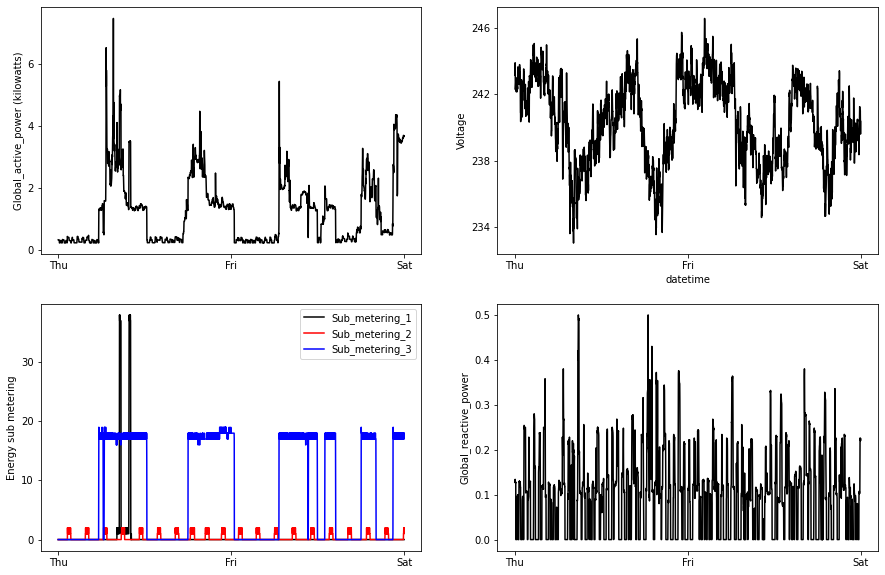

In [18]:
def plot4():
    plt.rcParams["figure.figsize"] = (15,10)
    fig, ax = plt.subplots(2,2)
    plot2(ax[0][0])
    plot5(ax[0][1])
    plot3(ax[1][0])
    plot6(ax[1][1])
    plt.savefig('plot4.png')
plot4()
## lưu hình vẽ 